In [1]:
from PIL import Image
import numpy as np  
import matplotlib.pyplot as plt

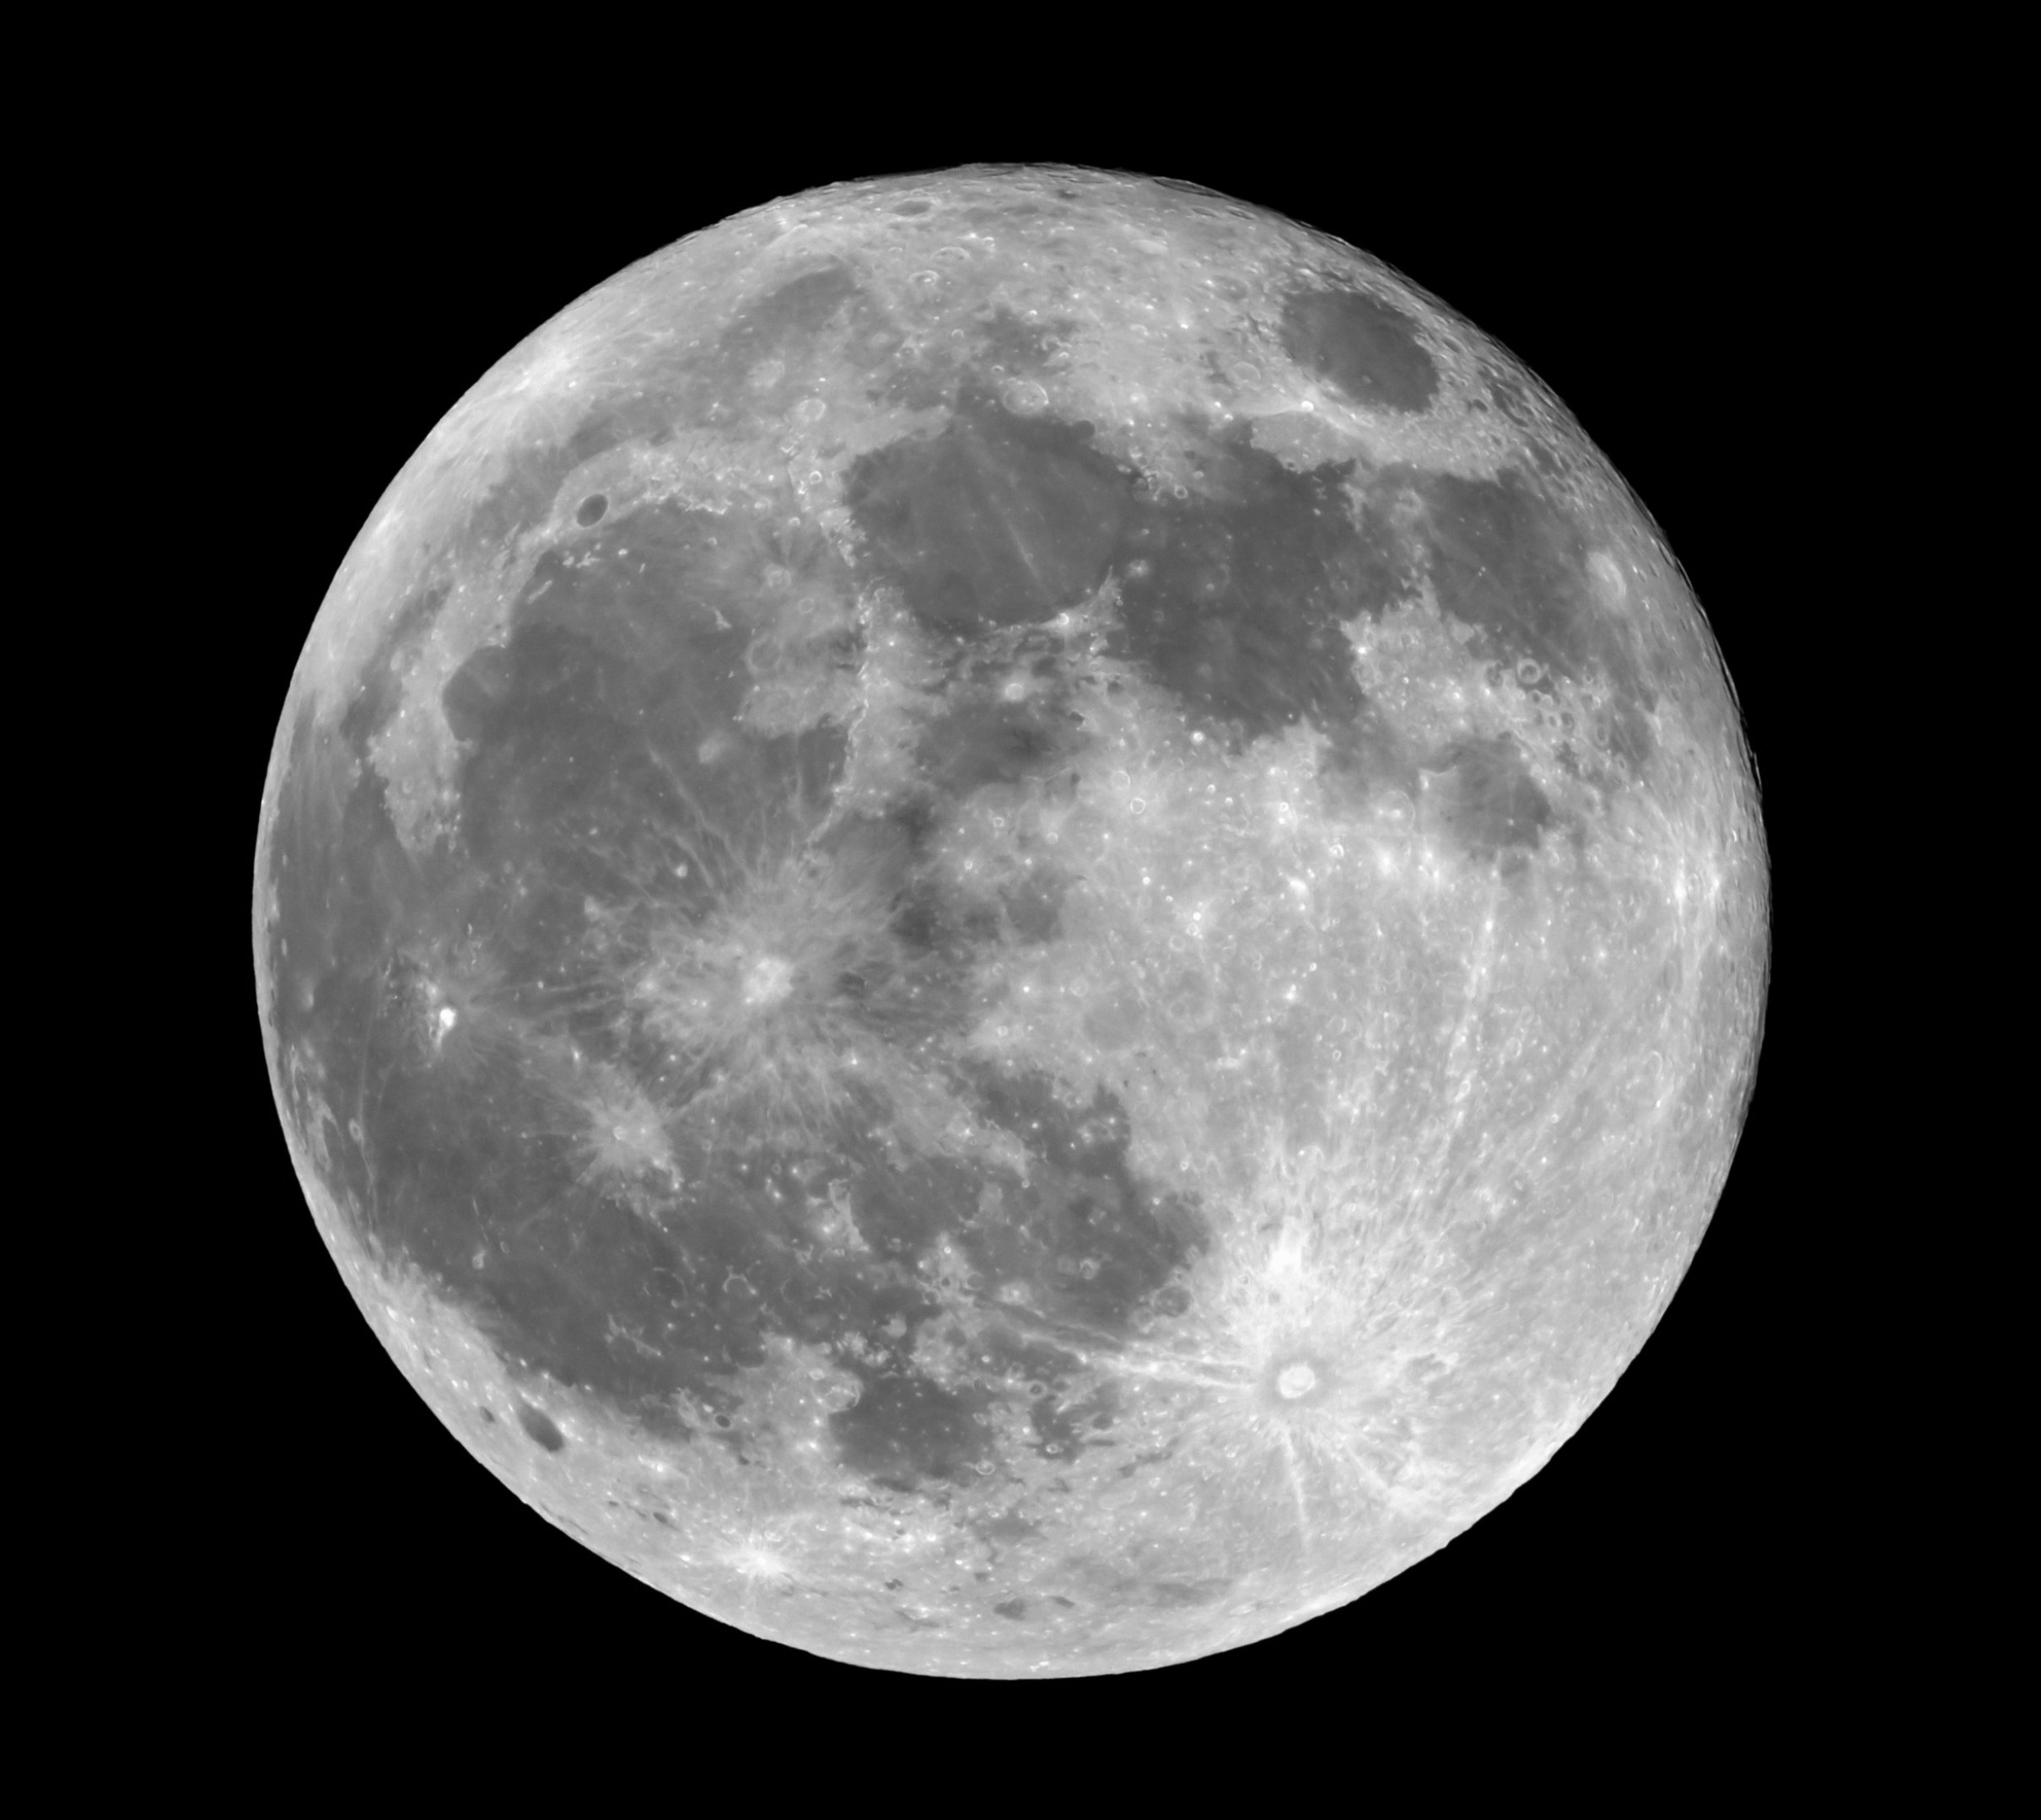

In [2]:
img = Image.open("moon.jpg").convert('L')
img

In [3]:
def gradientSimple(img):
    pixels = img.load()
    
    imageM = Image.new('L', (img.size[0],img.size[1]), color=255)
    pixelsM = imageM.load()
    
    for i in range(0,img.size[1]):
        for j in range(0,img.size[0]):
            s1 = 0
            s2 = 0
            if (j!=0):
                s1 = pixels[j,i]-pixels[j-1,i]
            if (i!=0):
                s2 = pixels[j,i]-pixels[j,i-1]
            pixelsM[j,i] = abs(s1) + abs(s2)
            
    return imageM

In [4]:
def task1(img):
    pixels = img.load()
    
    imageM = Image.new('L', (img.size[0],img.size[1]), color=255)
    pixelsM = imageM.load()
    
    for i in range(0,img.size[1]):
        for j in range(0,img.size[0]):
            s1 = 0
            s2 = 0
            if (j!=0):
                s1 = pixels[j,i]-pixels[j-1,i]
            if (i!=0):
                s2 = pixels[j,i]-pixels[j,i-1]
            pixelsM[j,i] = s1**2 + s2**2
            
    return imageM

In [5]:
def getHist(img):
    a = np.array(img)
    plt.hist(a.flatten(),256,[0,255]) 
    plt.show() 

In [6]:
def afterThreshold(img,thr):
    return img.point(lambda p: 255 if p > thr else 0) 

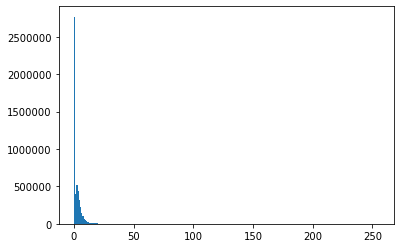

In [7]:
imgGrad = gradientSimple(img)
getHist(imgGrad)

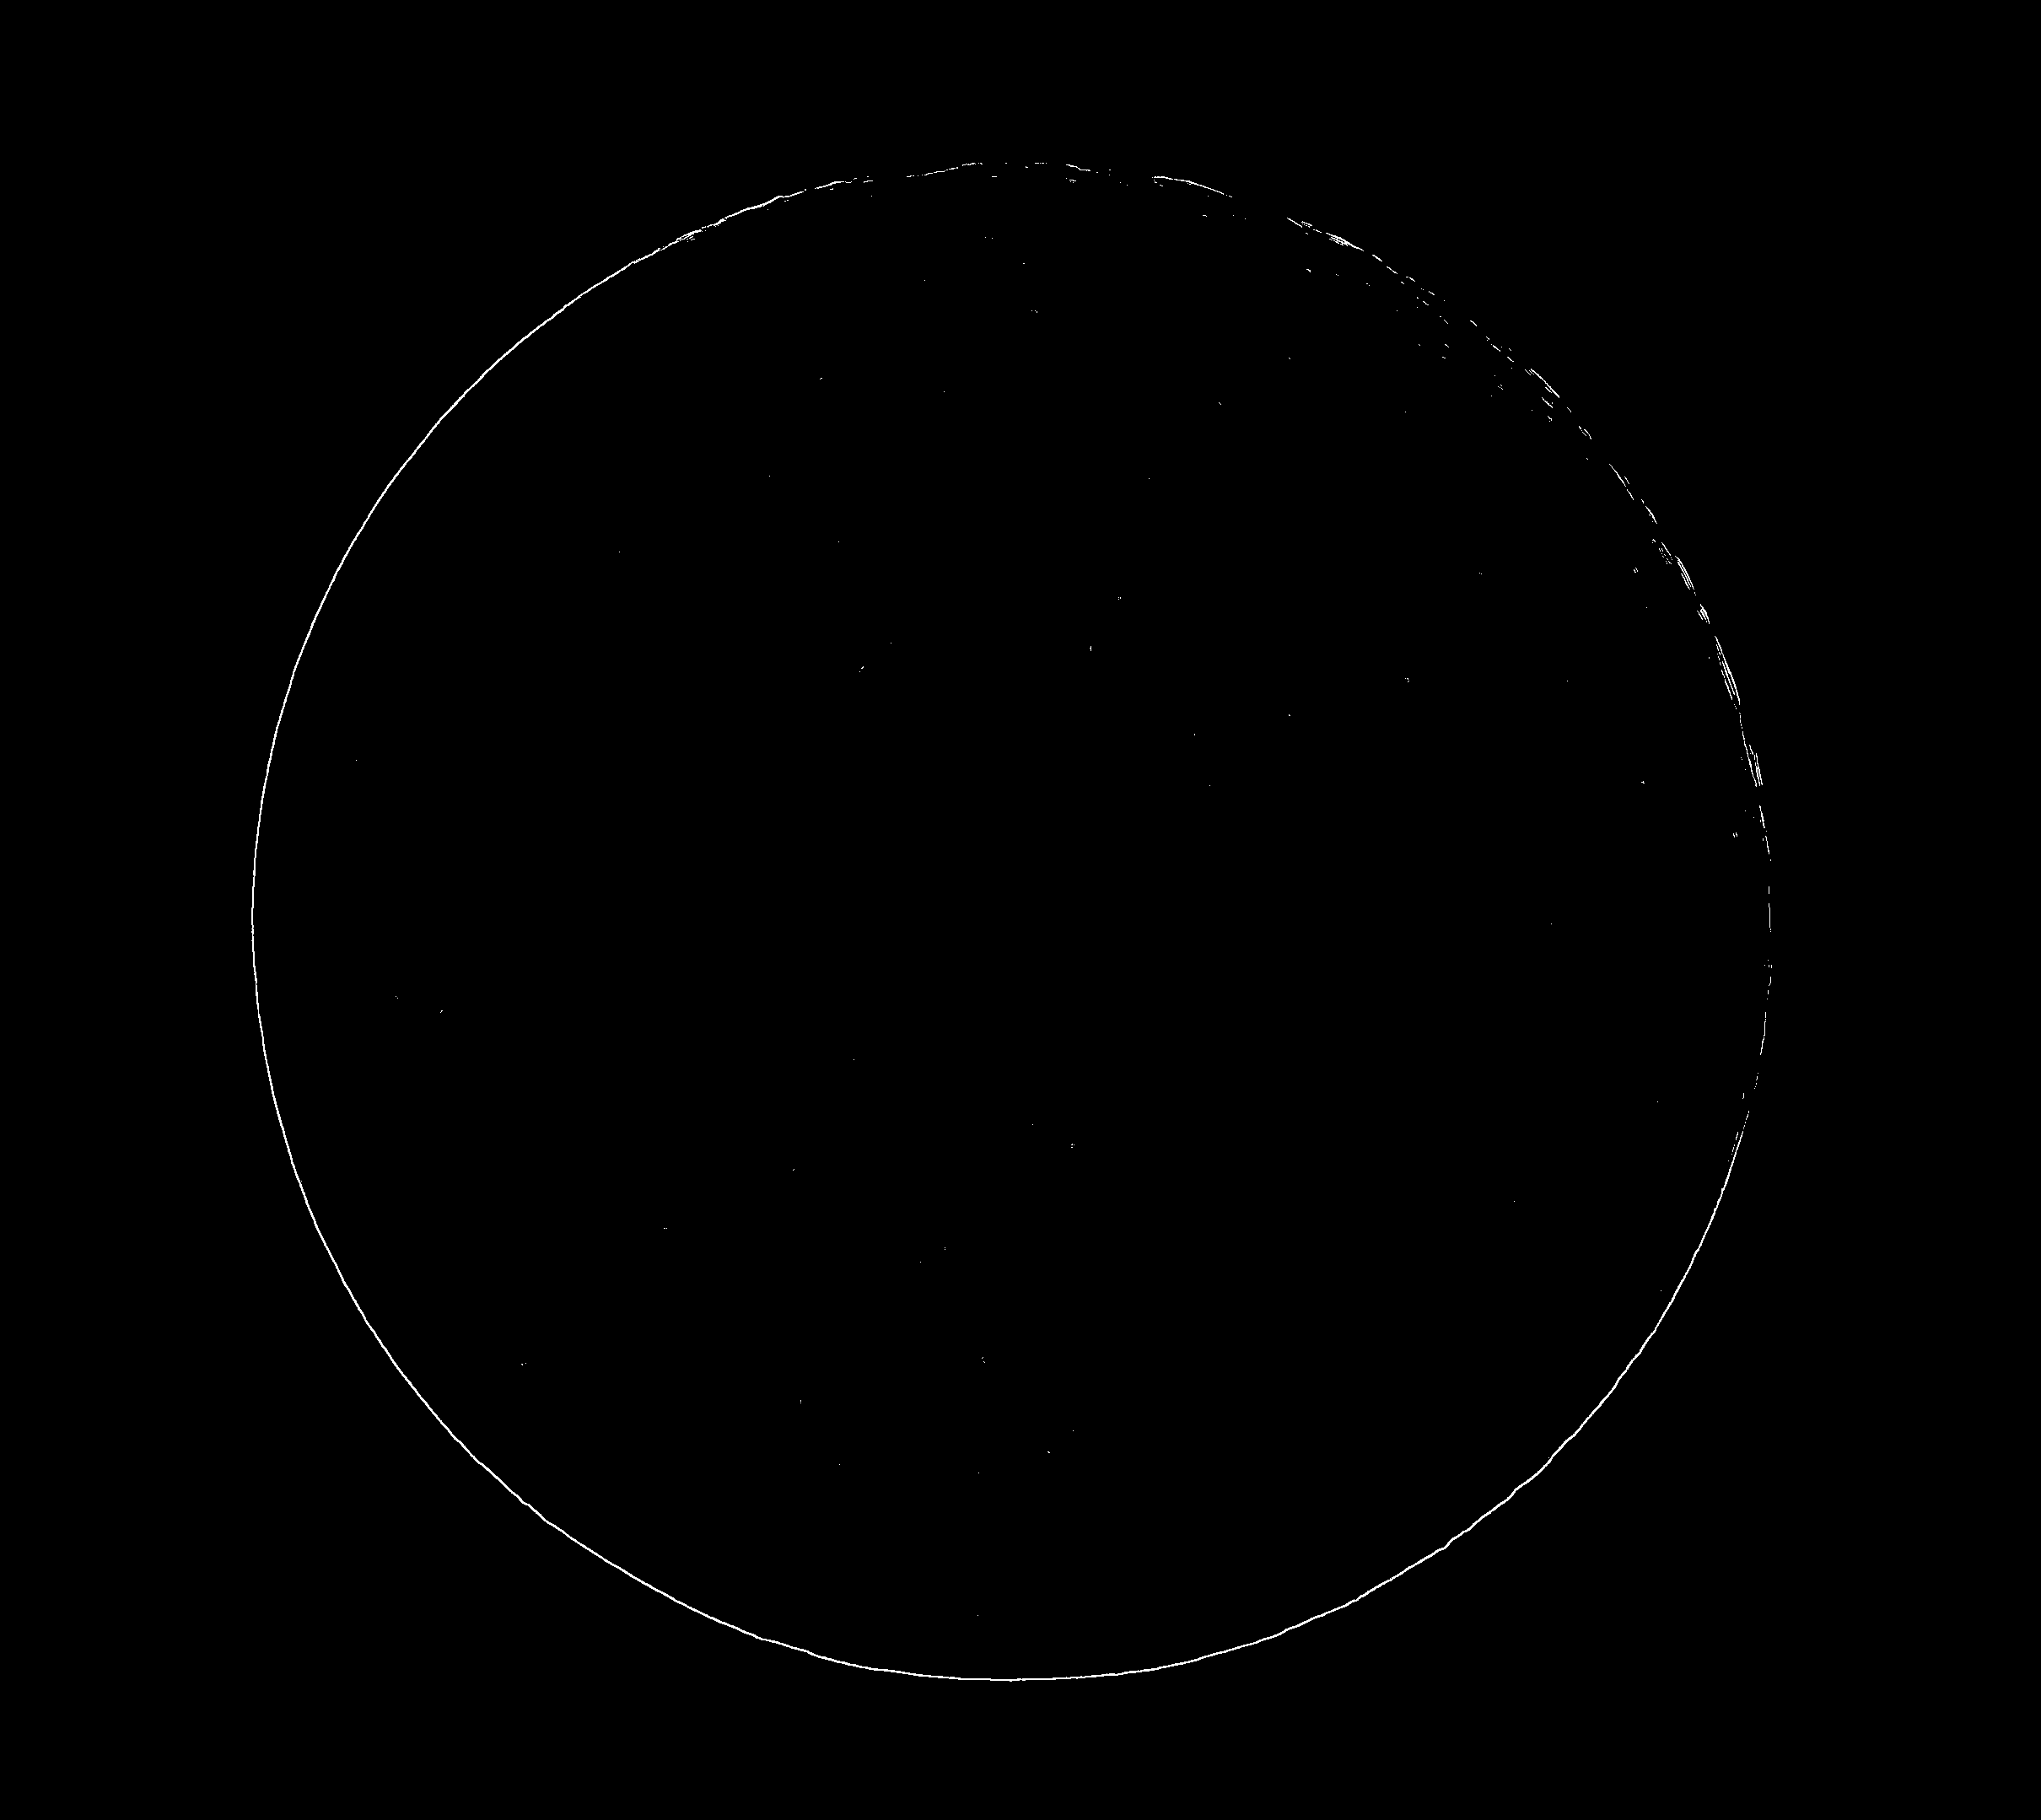

In [8]:
afterThreshold(imgGrad,40)

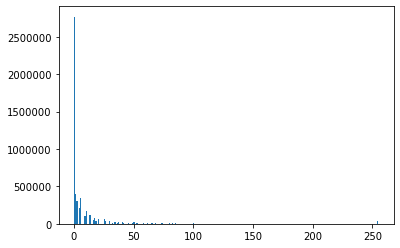

In [9]:
taskOne = task1(img)
getHist(taskOne)

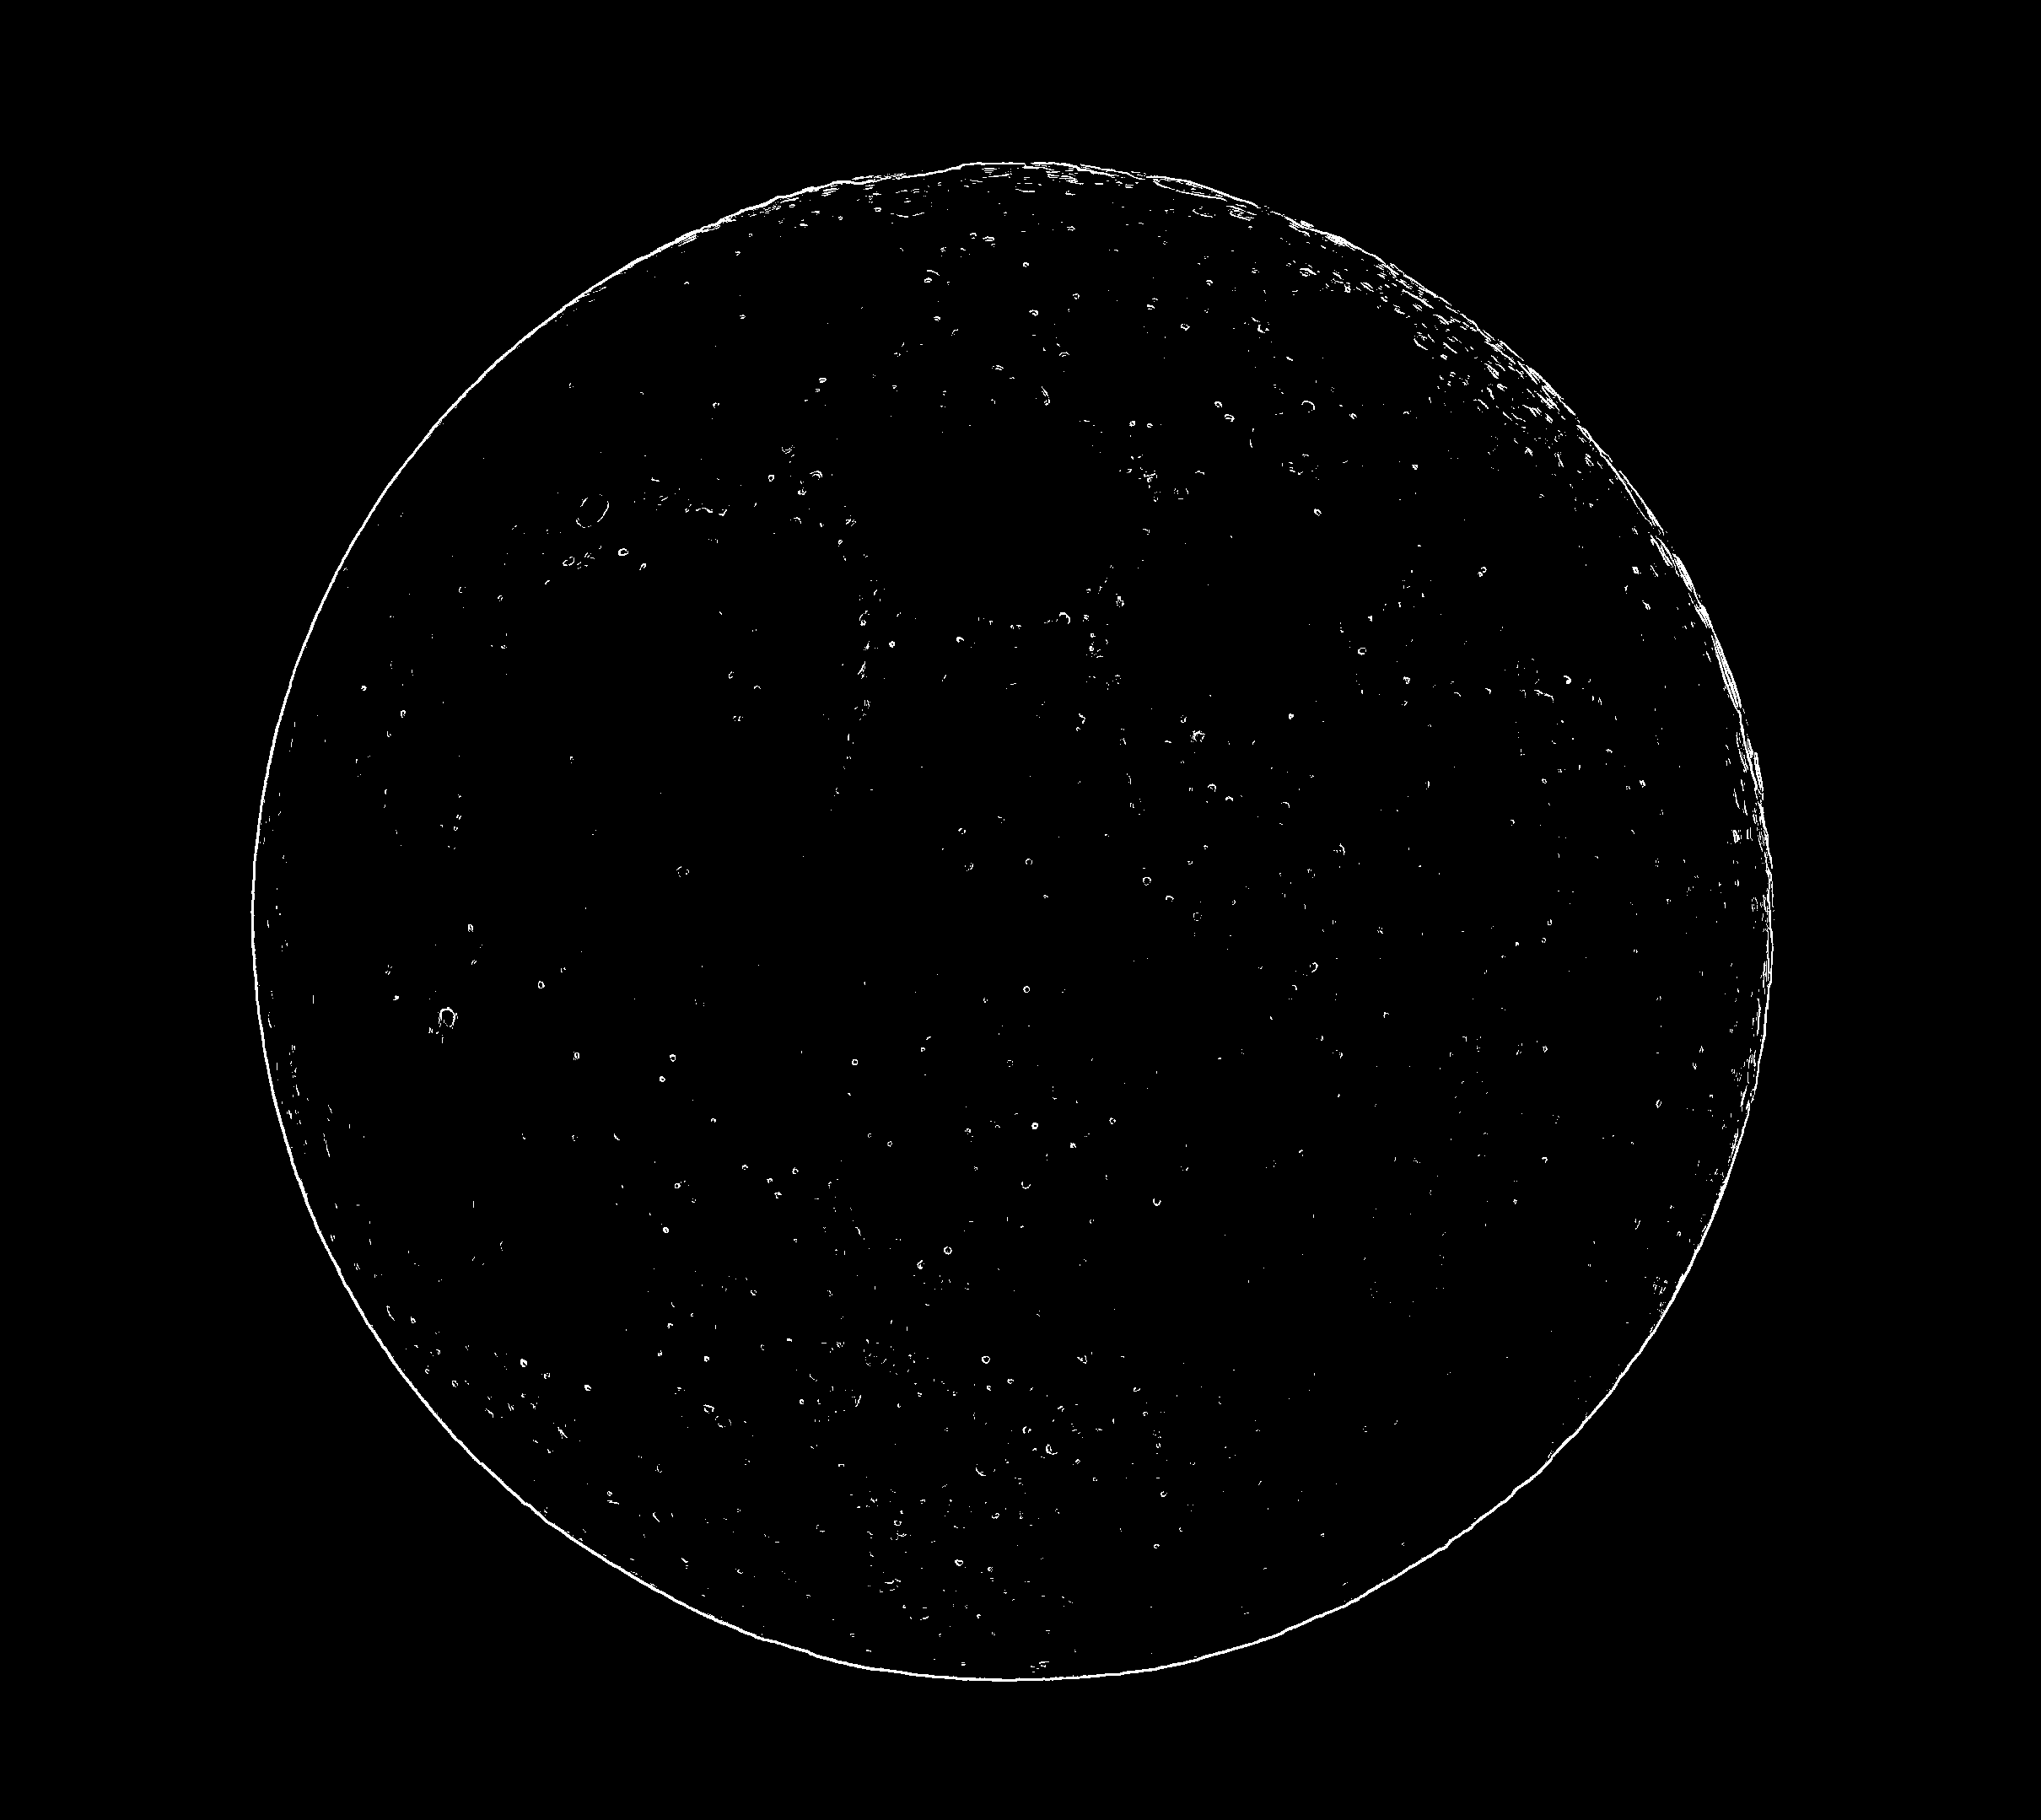

In [10]:
afterThreshold(taskOne,250)

In [11]:
def tensus(S, N1, N2, M1, M2):
    def getVecG(x1, x2):
        return np.transpose([x1**2,x2**2,x1*x2,x1, x2, 1])

    indN = 1 - N1
    indM = 1 - M1
    DiapN = range(N1,N2+1)
    DiapM = range(M1,M2+1)
    G = np.zeros((S, S))

    for k in range(0,S):
        for n in DiapN:
            for m in DiapM:
                G[k,:] = G[k,:]+(getVecG(n, m))[k] * np.transpose(getVecG(n, m))
            

    Ginv = np.linalg.inv(G)
    F = np.zeros(((N2 + indN, M2 + indM, S)))
    for k in range(0,S):
        for n in DiapN:
            for m in DiapM:
                for l in range (0,S):
                    F[n + indN - 1, m + indM - 1, k] = F[n + indN - 1, m + indM - 1, k] + Ginv[k, l] * \
                                                       (getVecG(n, m))[l]
    return F

In [12]:
f = tensus(6,-2,2,-2,2)

a = (f[:,:,0])
b = (f[:,:,1])
Fv= 2*a + 2*b
Fv

array([[ 0.11428571,  0.02857143,  0.        ,  0.02857143,  0.11428571],
       [ 0.02857143, -0.05714286, -0.08571429, -0.05714286,  0.02857143],
       [ 0.        , -0.08571429, -0.11428571, -0.08571429,  0.        ],
       [ 0.02857143, -0.05714286, -0.08571429, -0.05714286,  0.02857143],
       [ 0.11428571,  0.02857143,  0.        ,  0.02857143,  0.11428571]])

In [13]:
def myFilter(img,mask):
    pixels = img.load()
    
    newImage = img.copy()
    newImagePixels = newImage.load()

    ijStart = mask.shape[0] // 2
    iEnd = img.size[0]-ijStart
    jEnd = img.size[1]-ijStart
    
    mask = mask.flatten()
  
    for j in range(ijStart,jEnd):
        for i in range(ijStart,iEnd):
            frame = []
            for jFrame in range(j-ijStart,j+ijStart+1):
                for iFrame in range(i-ijStart,i+ijStart+1): 
                    frame.append(pixels[iFrame,jFrame])
            newImagePixels[i,j] = int(round(np.sum(mask*frame)))
            
    return newImage

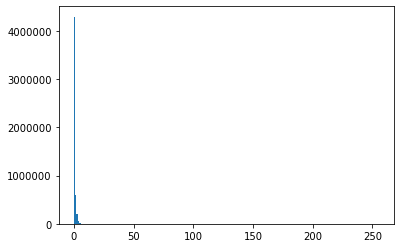

In [14]:
agreeImage = myFilter(img,Fv)
getHist(agreeImage)

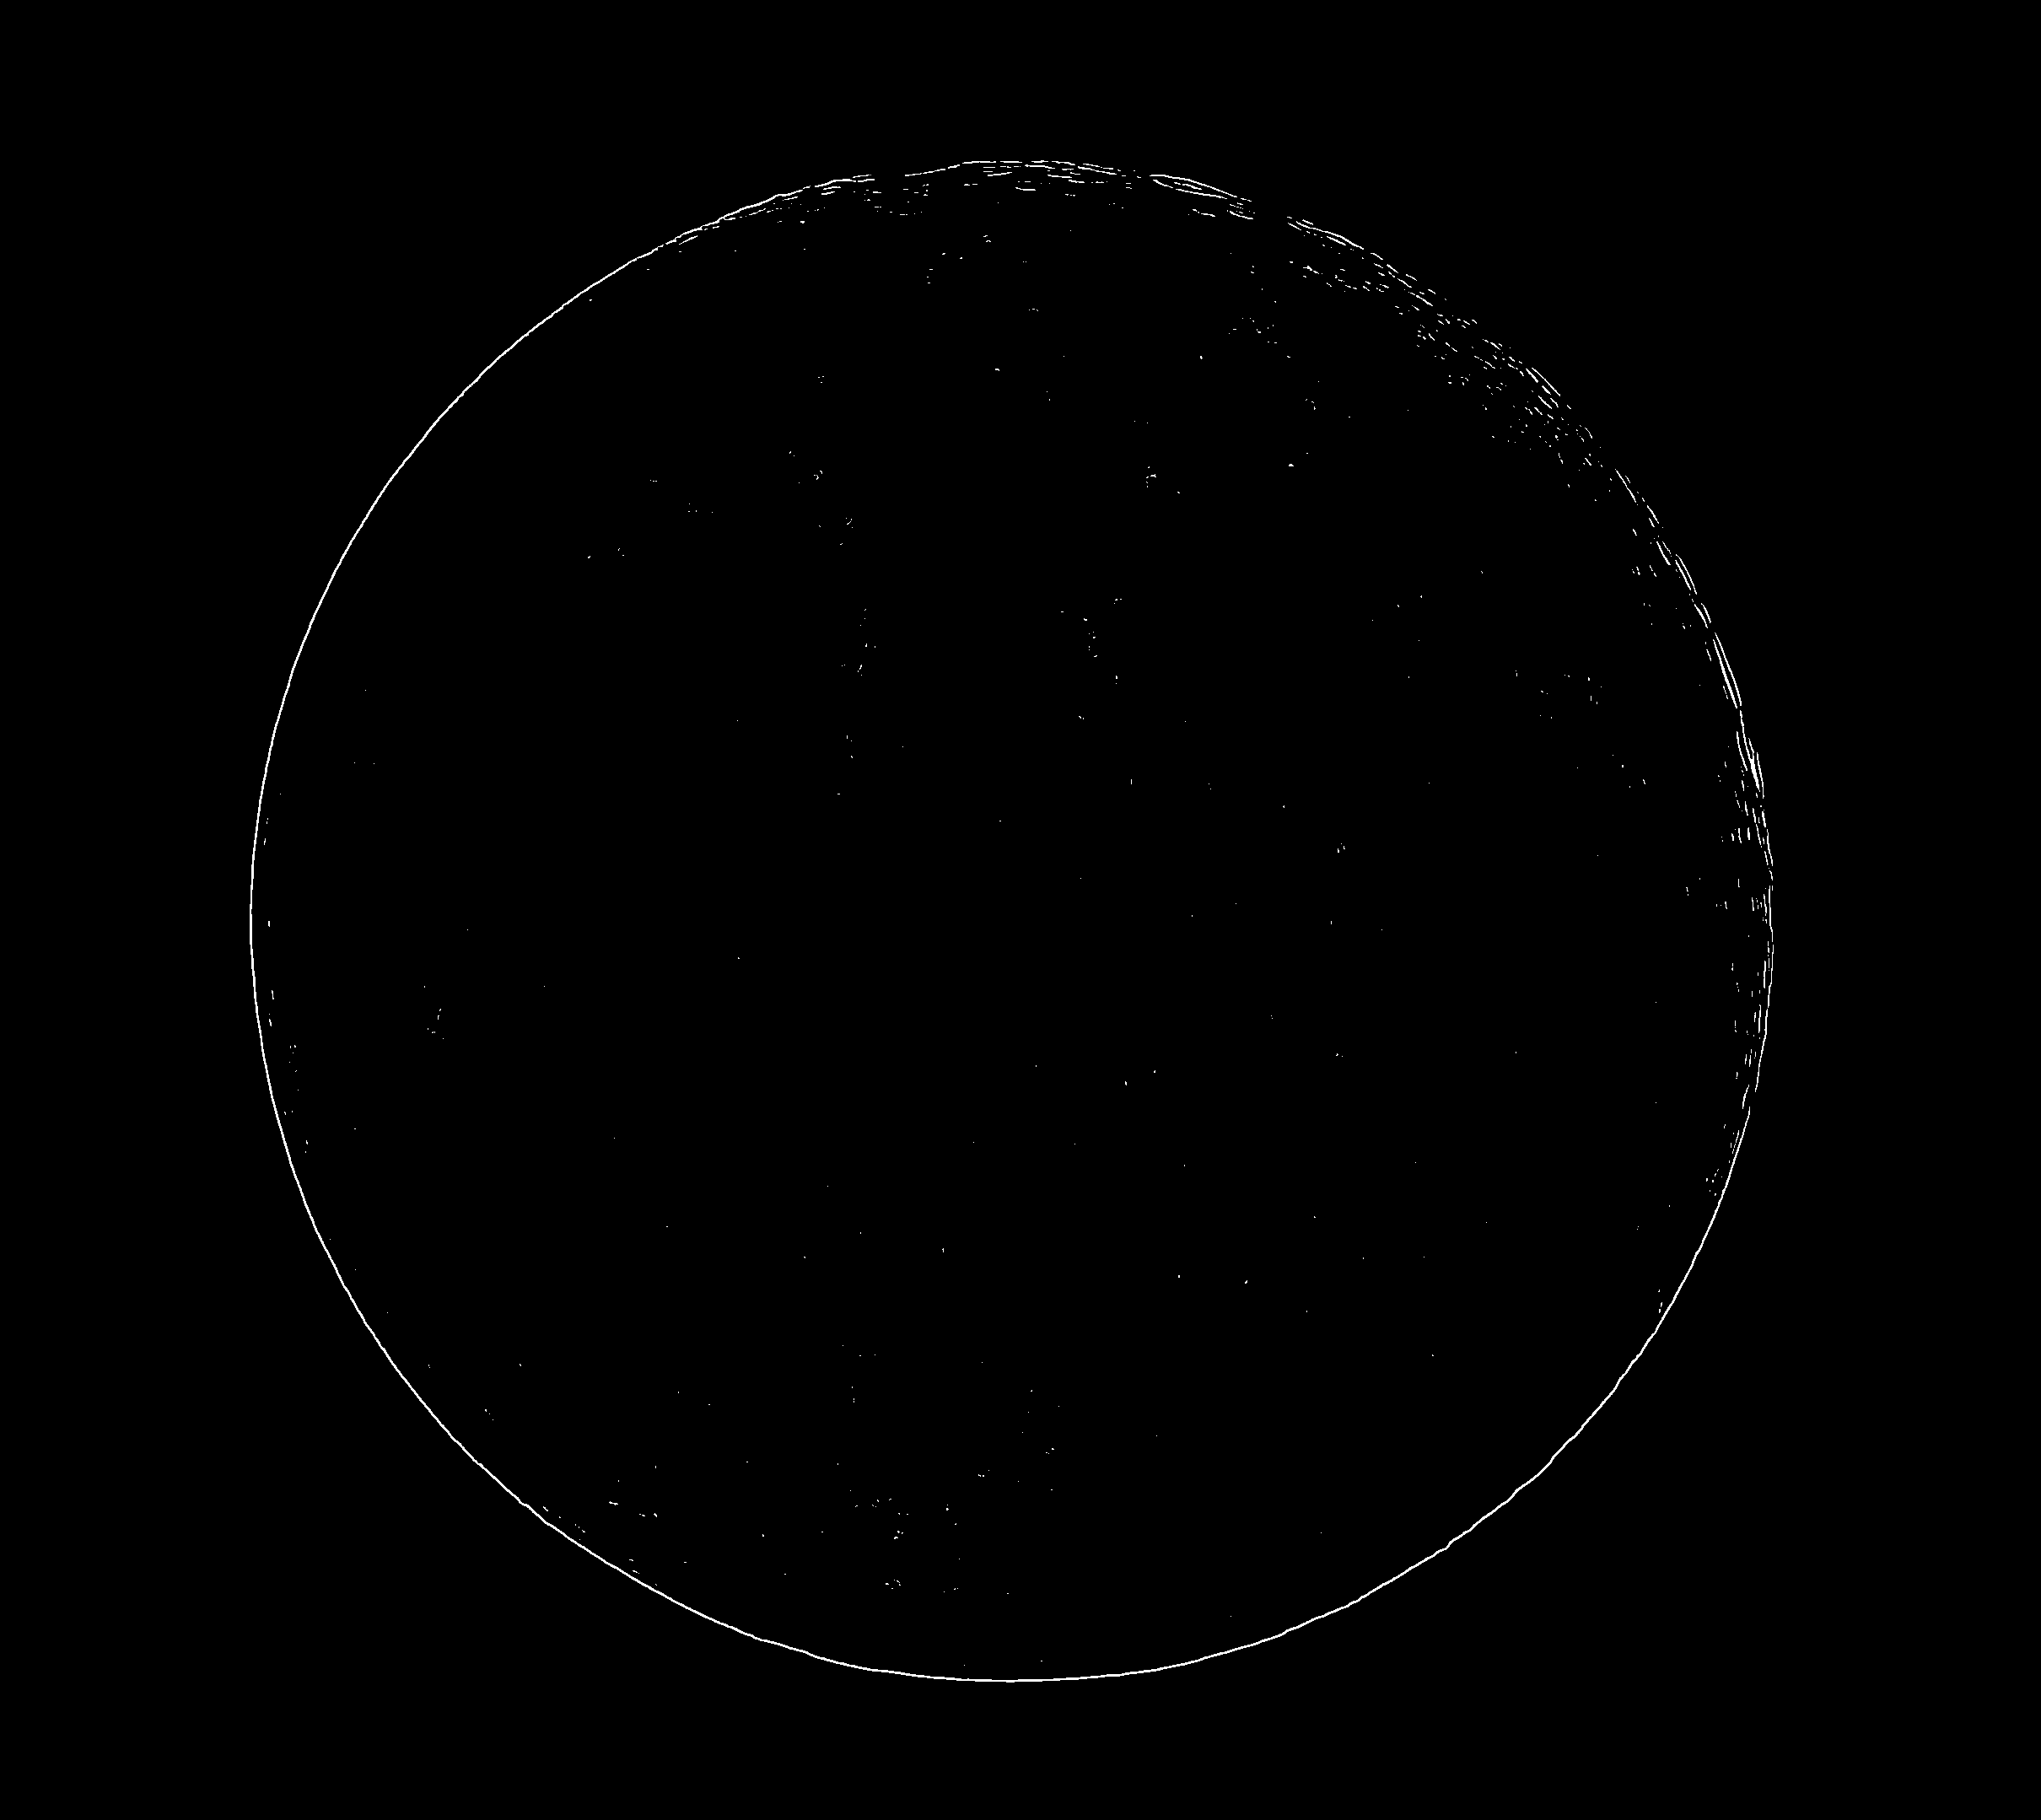

In [15]:
afterThreshold(agreeImage,7)